# Importing the libraries

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import pandas as pd

## Creating a Dataset
WE WANT TO CREATE A DATASET WHICH HAS IMAGES OF SIZE 15*50 OF TWO 2-DIGIT NUMBERS WITH PLUS OR MINUS SIGN BETWEEN THEM.WE WILL STACK SAMPLES OF SUCH IMAGES IN A NUMPY ARRAY  CALLED 'X'. WE will put the addition or substraction value of the numbers in an array 'Y'.
eg-

In [2]:
img = Image.new('RGB', (50,15), color = (0,255,0))
d = ImageDraw.Draw(img)
d.text((1,2), "100+200", fill=(0,0,255))
img

The output or the label will be '300'.

Our object of making such a project is to find if the Neural Network can figure out simple rules of arithematics or is it just good at finding similarity between images

In [372]:
X=np.ones([1,15,50])
Y=0
for i in range(5000):
    #randomly generation two number
    number1=np.random.randint(0,100)
    number2=np.random.randint(0,100)
    
    #randomly choosing which arithematic operation to perform
    Sign=random.choice([1,2])
    if Sign==2:
        sign='+'
    else:
        sign='-'
    
    
    #creating the image
    img = Image.new('RGB', (50,15), color = (0,255,0))
    d = ImageDraw.Draw(img)
    output_value=number1+(number2*(-1)**Sign)
    d.text((1,2), str(number1)+sign+str(number2), fill=(0,0,255))   
    
    
    #stacking the images
    X0=np.array(img)
    X0=X0[:,:,2]
    X0=np.expand_dims(X0,0)
    X=np.vstack([X,X0])
    
    
    ##stacking the labels
    Y0=output_value
    Y=np.hstack([Y,Y0])      

checking if we have created a proper dataset.
rerun to check different samples

Text(0.5, 1.0, '44')

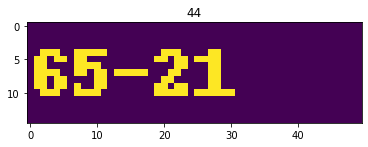

In [287]:
o=np.random.randint(0,2000)
plt.imshow(X[o,:,:])
plt.title(Y[o])

### creating training and test set 

In [373]:
X_train=X[:4000,:,:]
Y_train=Y[:4000]
X_test=X[4000:,:,:]
Y_test=Y[4000:]

### puting our data in a tensorflow sequential model

In [273]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(15,50)))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

In [323]:
model.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),metrics='MAE')

In [324]:
history=model.fit(X,Y,epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 2ms/step - loss: 0.3607 - MAE: 0.3607
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3595 - MAE: 0.3595
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3593 - MAE: 0.3593
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3594 - MAE: 0.3594
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3593 - MAE: 0.3593
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3594 - MAE: 0.3594
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3593 - MAE: 0.3593
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3592 - MAE: 0.3592
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3592 - MAE: 0.3592
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3592 - MAE: 0.3592
Epoch 11/50
63/63 [==============================] - 0s 2ms/step - lo

<AxesSubplot:>

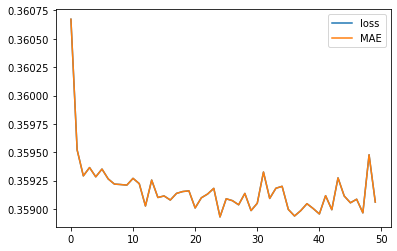

In [325]:
pd.DataFrame(history.history).plot()

In [362]:
## uploading already trained model for 
model = tf.keras.models.load_model('os.chdir')

In [367]:
example='10+2'            #custom camples to check the accuracy and limitations of the model
img = Image.new('RGB', (50,15), color = (0,255,0))
d = ImageDraw.Draw(img)
d.text((1,2),example,fill=(0,0,255))
img_array=np.array(img)
img_array=np.expand_dims(img_array[:,:,2],axis=0)
model.predict(img_array)

In [374]:
model.evaluate(X_test,Y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.4995 - MAE: 0.4995


[0.49945610761642456, 0.49945610761642456]

### the mean error of our model is 0.4995.

conclusion--

the neural network algorithm is able to figure out some rules of arithematics from images.Our model is trained for adding and subtracting two digit numbers and it works great with 2 digit number but it is unable to calculate 3 digit arithematic problems 